I want to set up a function which converts angles in one spherical system to angles in another sherical system, given the angular position of the new system.

Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

In [72]:
def construct_Rz(theta):
    ct = np.cos(theta)
    st = np.sin(theta)
    R = np.array([[ct, -st, 0], [st, ct, 0], [0, 0, 1]])
    return R

def construct_Ry(theta):
    ct = np.cos(theta)
    st = np.sin(theta)
    R = np.array([[ct, 0, st], [0, 1, 0], [-st, 0, ct]])
    return R

def convert_pos(pos, theta0, phi0):
    R1 = construct_Rz(-phi0)
    R2 = construct_Ry(-theta0)
    pos_new = np.matmul(R2, np.matmul(R1, pos))
    return pos_new

def convert_angles(theta, phi, theta0, phi0):
    # convert to Cartesian
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    pos = np.stack((x, y, z))
    
    # rotate
    R1 = construct_Rz(-phi0)
    R2 = construct_Ry(-theta0)
    pos_new = np.matmul(R2, np.matmul(R1, pos))
    x_new = pos_new[0]
    y_new = pos_new[1]
    z_new = pos_new[2]

    # get angles
    phi_new = np.arctan2(y_new, x_new)
    theta_new = np.arctan2(np.sqrt(x_new**2 + y_new**2), z_new)
    return theta_new, phi_new

Sphere test, construct large number of random points in small ball around random centre. First, generate points:

In [19]:
N_pts = 1000000
np.random.seed(42)
rs = np.random.uniform(low=0, high=0.05, size=N_pts)
phis = np.random.uniform(low=0, high=2*pi, size=N_pts)
thetas = np.arccos(1 - 2 * np.random.uniform(size=N_pts))
xcen = np.random.uniform(low=-1, high=1)
ycen = np.random.uniform(low=-1, high=1)
zcen = np.random.uniform(low=-1, high=1)
phi0 = np.arctan2(ycen, xcen)
theta0 = np.arctan2(np.sqrt(xcen**2 + ycen**2), zcen)

x = xcen + rs * np.sin(thetas) * np.cos(phis)
y = ycen + rs * np.sin(thetas) * np.sin(phis)
z = zcen + rs * np.cos(thetas)
pos = np.stack((x, y, z))

Rotate:

In [33]:
pos_new = convert_pos(pos, theta0, phi0)

Check radial positions same:

In [40]:
r = np.linalg.norm(pos, axis=0)
r_new = np.linalg.norm(pos_new, axis=0)
np.testing.assert_allclose(r, r_new)

Check angles:

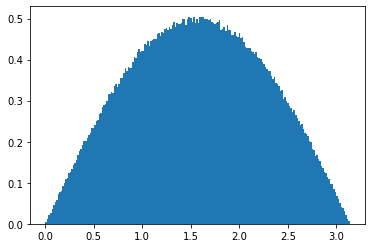

In [55]:
theta_new = np.arctan2(np.sqrt(pos_new[0]**2 + pos_new[1]**2), pos_new[2] - np.average(pos_new[2]))
plt.hist(theta_new, 200, density=True);

Looks good!

Plane test: choose random direction for orientation of plane passing through origin, sample points in plane, then rotate.

In [65]:
np.random.seed(42)
phi0 = np.random.uniform(low=0, high=2*pi)
theta0 = np.arccos(1 - 2 * np.random.uniform())
A = np.sin(theta0) * np.cos(phi0)
B = np.sin(theta0) * np.sin(phi0)
C = np.cos(theta0)

N_pts = 100000
x = np.random.uniform(low=-1, high=1, size=N_pts)
y = np.random.uniform(low=-1, high=1, size=N_pts)
z = - (A * x + B * y) / C
pos = np.stack((x, y, z))
pos_new = convert_pos(pos, theta0, phi0)